<a href="https://colab.research.google.com/github/naira404/Deep-Learning-Tasks/blob/main/CXR_CT_COUGH_Task2_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hossamfakher/cxr-ct-cough")

print("Path to dataset files:", path)

100%|██████████| 109M/109M [00:05<00:00, 20.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/hossamfakher/cxr-ct-cough/versions/3


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.metrics import classification_report



In [ ]:

# Use the path where the dataset was downloaded by kagglehub
data_path = "/root/.cache/kagglehub/datasets/hossamfakher/cxr-ct-cough/versions/3"
inner_path = os.path.join(data_path, "processed_dataset")
print(os.listdir(inner_path))

data_path_im = os.path.join(inner_path, "processed_dataset")
print(os.listdir(data_path_im))

['processed_dataset']
['CXR', 'CT', 'Cough sound']


In [ ]:
# CXR
input_cxr = Input(shape=(224, 224, 3), name='CXR_Input')
x1 = Conv2D(32, (3,3), activation='relu', padding='same')(input_cxr)
x1 = MaxPooling2D((2,2))(x1)
x1 = Conv2D(64, (3,3), activation='relu', padding='same')(x1)
x1 = MaxPooling2D((2,2))(x1)
x1 = Flatten()(x1)
x1 = Dense(128, activation='relu')(x1)

In [ ]:
# CT
input_ct = Input(shape=(224, 224, 3), name='CT_Input')
x2 = Conv2D(32, (3,3), activation='relu', padding='same')(input_ct)
x2 = MaxPooling2D((2,2))(x2)
x2 = Conv2D(64, (3,3), activation='relu', padding='same')(x2)
x2 = MaxPooling2D((2,2))(x2)
x2 = Flatten()(x2)
x2 = Dense(128, activation='relu')(x2)

In [ ]:
# Cough sound
input_audio = Input(shape=(128, 128, 1), name='Audio_Input')
x3 = Conv2D(32, (3,3), activation='relu', padding='same')(input_audio)
x3 = MaxPooling2D((2,2))(x3)
x3 = Conv2D(64, (3,3), activation='relu', padding='same')(x3)
x3 = MaxPooling2D((2,2))(x3)
x3 = Flatten()(x3)
x3 = Dense(128, activation='relu')(x3)

In [ ]:
# Concat
merged = Concatenate()([x1, x2, x3])
z = Dense(256, activation='relu')(merged)
z = Dropout(0.4)(z)
output = Dense(4, activation='softmax', name='Output')(z)

fusion_model = Model(inputs=[input_cxr, input_ct, input_audio], outputs=output)

fusion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fusion_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ CXR_Input           │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CT_Input            │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Audio_Input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        896 │ CXR_Input[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 224, 224,  │        896 │ CT_Input[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │        320 │ Audio_Input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 112, 112,  │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_4[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 56, 56,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 200704)    │          0 │ max_pooling2d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 200704)    │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 59,926,404 (228.60 MB)

 Trainable params: 59,926,404 (228.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


data_path = "/root/.cache/kagglehub/datasets/hossamfakher/cxr-ct-cough/versions/3/processed_dataset/processed_dataset"

print("Folders inside dataset:", os.listdir(data_path))

# Create training generators
img_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# 🔹 CXR generator
cxr_train = img_gen.flow_from_directory(
    os.path.join(data_path, "CXR"),
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical',
    shuffle=False
)

# 🔹 CT generator
ct_train = img_gen.flow_from_directory(
    os.path.join(data_path, "CT"),
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical',
    shuffle=False
)

# 🔹 Audio generator
audio_train = img_gen.flow_from_directory(
    os.path.join(data_path, "Cough sound"),
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    subset='training',
    class_mode='categorical',
    shuffle=False
)


Folders inside dataset: ['CXR', 'CT', 'Cough sound']
Found 1600 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [ ]:
#  CT
ct_train = img_gen.flow_from_directory(
    os.path.join(data_path, "CT"),
    target_size=(224, 224),
    batch_size=64,
    subset='training',
    class_mode='categorical'
)

ct_val = img_gen.flow_from_directory(
    os.path.join(data_path, "CT"),
    target_size=(224, 224),
    batch_size=64,
    subset='validation',
    class_mode='categorical'
)

Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [ ]:
#  Cough sound
audio_train = img_gen.flow_from_directory(
    os.path.join(data_path, "Cough sound"),
    target_size=(128, 128),
    color_mode='grayscale',   #
    batch_size=64,
    subset='training',
    class_mode='categorical'
)

audio_val = img_gen.flow_from_directory(
    os.path.join(data_path, "Cough sound"),
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=64,
    subset='validation',
    class_mode='categorical'
)

Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


Intermediate Fusion Model

In [ ]:

epochs = 10

steps_per_epoch = min(len(cxr_train), len(ct_train), len(audio_train))
val_steps = min(len(cxr_val), len(ct_val), len(audio_val))

history_loss = []
history_acc = []

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}")
    epoch_loss = 0
    epoch_acc = 0
    for step in range(steps_per_epoch):
        cxr_batch, y_cxr = next(cxr_train)
        ct_batch, y_ct = next(ct_train)
        audio_batch, y_audio = next(audio_train)

        loss, acc = fusion_model.train_on_batch(
            [cxr_batch, ct_batch, audio_batch],
            y_cxr
        )
        epoch_loss += loss
        epoch_acc += acc

        if step % 20 == 0:
            print(f" Step {step}/{steps_per_epoch} - loss: {loss:.4f} - acc: {acc:.4f}")

    avg_epoch_loss = epoch_loss / steps_per_epoch
    avg_epoch_acc = epoch_acc / steps_per_epoch
    history_loss.append(avg_epoch_loss)
    history_acc.append(avg_epoch_acc)
    print(f"Epoch {epoch+1} average loss: {avg_epoch_loss:.4f} - average acc: {avg_epoch_acc:.4f}")

print("\n End Model Train \n")


Epoch 1/10
 Step 0/25 - loss: 0.2943 - acc: 0.9044
 Step 20/25 - loss: 0.2733 - acc: 0.9113
Epoch 1 average loss: 0.2816 - average acc: 0.9086

Epoch 2/10
 Step 0/25 - loss: 0.2685 - acc: 0.9128
 Step 20/25 - loss: 0.2512 - acc: 0.9184
Epoch 2 average loss: 0.2580 - average acc: 0.9162

Epoch 3/10
 Step 0/25 - loss: 0.2473 - acc: 0.9197
 Step 20/25 - loss: 0.2326 - acc: 0.9246
Epoch 3 average loss: 0.2384 - average acc: 0.9227

Epoch 4/10
 Step 0/25 - loss: 0.2290 - acc: 0.9258
 Step 20/25 - loss: 0.2160 - acc: 0.9300
Epoch 4 average loss: 0.2211 - average acc: 0.9284

Epoch 5/10
 Step 0/25 - loss: 0.2130 - acc: 0.9310
 Step 20/25 - loss: 0.2017 - acc: 0.9347
Epoch 5 average loss: 0.2061 - average acc: 0.9333

Epoch 6/10
 Step 0/25 - loss: 0.1990 - acc: 0.9356
 Step 20/25 - loss: 0.1891 - acc: 0.9388
Epoch 6 average loss: 0.1930 - average acc: 0.9376

Epoch 7/10
 Step 0/25 - loss: 0.1867 - acc: 0.9396
 Step 20/25 - loss: 0.1779 - acc: 0.9425
Epoch 7 average loss: 0.1814 - average acc:

In [ ]:
# validation
y_true, y_pred = [], []

for step in range(val_steps):
    cxr_batch, y_val = next(cxr_val)
    ct_batch, _ = next(ct_val)
    audio_batch, _ = next(audio_val)

    preds = fusion_model.predict([cxr_batch, ct_batch, audio_batch])
    y_true.extend(np.argmax(y_val, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:

print("\n Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=cxr_train.class_indices.keys()))


 Classification Report:

              precision    recall  f1-score   support

     Healthy       0.90      0.84      0.87       100
 LungsCancer       0.99      1.00      1.00       100
   Pneumonia       0.91      0.96      0.93       100
       covid       0.88      0.88      0.88       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



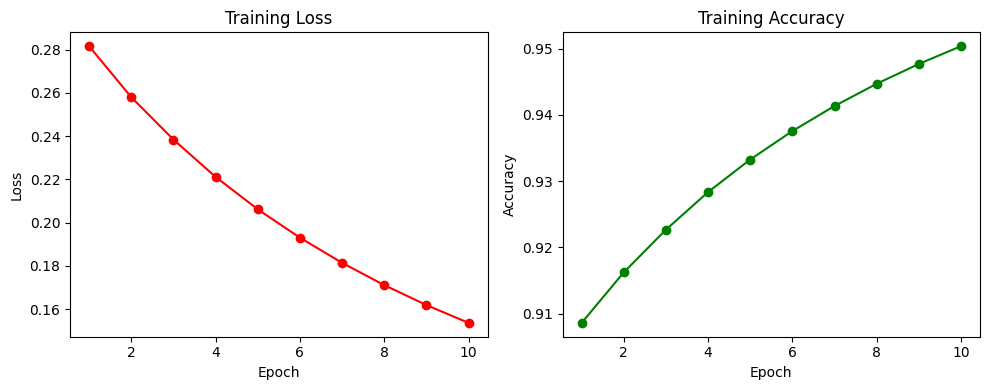

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, len(history_loss) + 1)

plt.figure(figsize=(10, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history_loss, marker='o', color='red')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, history_acc, marker='o', color='green')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


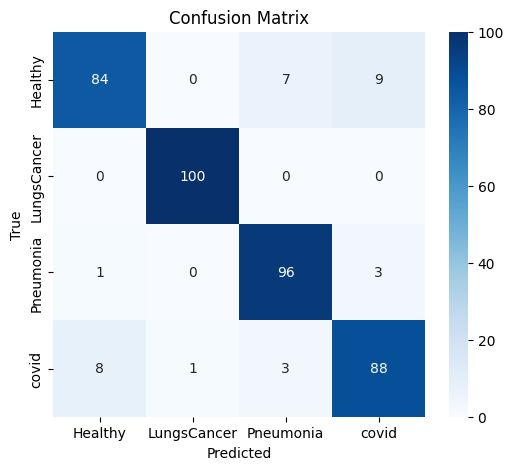

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

classes = list(cxr_train.class_indices.keys())
cm = confusion_matrix(y_true, y_pred, labels=np.arange(len(classes)))

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
for layer in fusion_model.layers:
    if 'conv' in layer.name:
        print(layer.name)

conv2d
conv2d_2
conv2d_4
conv2d_1
conv2d_3
conv2d_5


In [ ]:

data_path_im = "/root/.cache/kagglehub/datasets/hossamfakher/cxr-ct-cough/versions/3/processed_dataset/processed_dataset"
print("Contents of data_path_im:", os.listdir(data_path_im))

cxr_path = os.path.join(data_path_im, "CXR" , "covid")
print(os.listdir(cxr_path))

Contents of data_path_im: ['CXR', 'CT', 'Cough sound']
['covid191.jpg', 'covid379.jpg', 'covid108.jpg', 'covid450.jpg', 'covid139.jpg', 'covid485.jpg', 'covid29.jpg', 'covid276.jpg', 'covid372.jpg', 'covid491.jpg', 'covid392.jpg', 'covid376.jpg', 'covid253.jpg', 'covid157.jpg', 'covid263.jpg', 'covid59.jpg', 'covid399.jpg', 'covid465.jpg', 'covid318.jpg', 'covid425.jpg', 'covid66.jpg', 'covid293.jpg', 'covid498.jpg', 'covid472.jpg', 'covid393.jpg', 'covid230.jpg', 'covid34.jpg', 'covid435.jpg', 'covid199.jpg', 'covid443.jpg', 'covid413.jpg', 'covid18.jpg', 'covid286.jpg', 'covid274.jpg', 'covid273.jpg', 'covid136.jpg', 'covid412.jpg', 'covid57.jpg', 'covid282.jpg', 'covid74.jpg', 'covid299.jpg', 'covid160.jpg', 'covid122.jpg', 'covid15.jpg', 'covid4.jpg', 'covid102.jpg', 'covid438.jpg', 'covid319.jpg', 'covid374.jpg', 'covid360.jpg', 'covid87.jpg', 'covid359.jpg', 'covid208.jpg', 'covid183.jpg', 'covid58.jpg', 'covid426.jpg', 'covid420.jpg', 'covid497.jpg', 'covid350.jpg', 'covid11.jpg

In [ ]:
!pip install lime tf-keras-vis --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.6 MB/s eta 0:00:00


In [ ]:
# EXPLAINABILITY VISUALIZATION
import tensorflow as tf
import cv2
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras.models import Model

In [ ]:
def get_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs],
                       [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
def overlay_heatmap(heatmap, image, alpha=0.4, colormap=cv2.COLORMAP_JET):
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)
    output = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)
    return output

In [ ]:
# Load test image
image_path = "/root/.cache/kagglehub/datasets/hossamfakher/cxr-ct-cough/versions/3/processed_dataset/processed_dataset/CXR/covid/covid44.jpg"

img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224,224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array/255.0, axis=0)

In [ ]:
# Grad-CAM
heatmap = get_gradcam_heatmap(
    [img_array, np.zeros((1,224,224,3)), np.zeros((1,128,128,1))],
    fusion_model,
    last_conv_layer_name='conv2d_1'
)
gradcam_image = overlay_heatmap(heatmap, np.uint8(img_array[0]*255))


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['CXR_Input', 'CT_Input', 'Audio_Input']]
Received: inputs=['Tensor(shape=(1, 224, 224, 3))', 'Tensor(shape=(1, 224, 224, 3))', 'Tensor(shape=(1, 128, 128, 1))']
  warnings.warn(msg)


In [ ]:
#  LIME
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    np.uint8(img_array[0]*255),
    classifier_fn=lambda x: fusion_model.predict(
        [x, np.zeros((x.shape[0],224,224,3)), np.zeros((x.shape[0],128,128,1))]
    ),
    top_labels=1,
    hide_color=0,
    num_samples=1000
)
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only=True,
    num_features=8,
    hide_rest=False
)
lime_image_result = mark_boundaries(temp/255.0, mask)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━

In [ ]:
#  Saliency Map
score = CategoricalScore(0)
saliency = Saliency(fusion_model, model_modifier=ReplaceToLinear(), clone=True)
saliency_map = saliency(score, [img_array, np.zeros((1,224,224,3)), np.zeros((1,128,128,1))])
saliency_map = saliency_map[0]
saliency_map = (saliency_map - saliency_map.min()) / (saliency_map.max() - saliency_map.min())


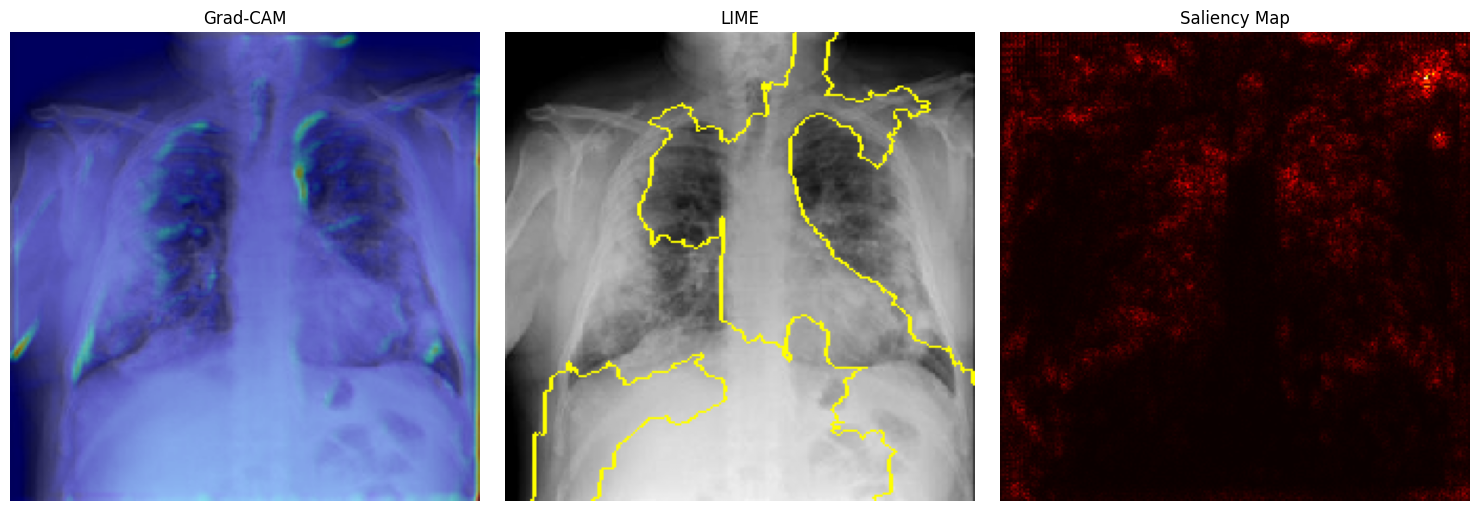

In [ ]:
# Display results
fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Grad-CAM")

axes[1].imshow(lime_image_result)
axes[1].set_title("LIME")

saliency_to_show = np.squeeze(saliency_map)
axes[2].imshow(saliency_to_show, cmap='hot')
axes[2].set_title("Saliency Map")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate, Lambda
from tensorflow.keras.models import Model


# Inputs
input_cxr = Input(shape=(224, 224, 3), name='CXR_Input')
input_ct = Input(shape=(224, 224, 3), name='CT_Input')
input_audio = Input(shape=(128, 128, 1), name='Audio_Input')

# Step 1: Extract low-level features (early stage)
# Lightweight Conv block for each modality
def early_features(x, name_prefix):
    x = Conv2D(16, (3,3), activation='relu', padding='same', name=f'{name_prefix}_conv1')(x)
    x = MaxPooling2D((2,2), name=f'{name_prefix}_pool1')(x)
    return x

cxr_feat = early_features(input_cxr, 'CXR')
ct_feat = early_features(input_ct, 'CT')
audio_feat = early_features(input_audio, 'Audio')

# Step 2: Resize audio feature map to match image dimensions using Lambda layer
audio_feat_resized = Lambda(lambda z: tf.image.resize(z, (cxr_feat.shape[1], cxr_feat.shape[2])))(audio_feat)


# Step 3: Early Fusion (concatenate features)
merged = Concatenate(axis=-1)([cxr_feat, ct_feat, audio_feat_resized])

# Step 4: Continue with shared CNN layers (common feature extractor)
x = Conv2D(64, (3,3), activation='relu', padding='same')(merged)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)

# Step 5: Output
output = Dense(4, activation='softmax')(x)

# Model
early_fusion_model = Model(inputs=[input_cxr, input_ct, input_audio], outputs=output)

early_fusion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_fusion_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Audio_Input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CXR_Input           │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CT_Input            │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Audio_conv1         │ (None, 128, 128,  │        160 │ Audio_Input[0][0] │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CXR_conv1 (Conv2D)  │ (None, 224, 224,  │        448 │ CXR_Input[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CT_conv1 (Conv2D)   │ (None, 224, 224,  │        448 │ CT_Input[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Audio_pool1         │ (None, 64, 64,    │          0 │ Audio_conv1[0][0] │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CXR_pool1           │ (None, 112, 112,  │          0 │ CXR_conv1[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CT_pool1            │ (None, 112, 112,  │          0 │ CT_conv1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 112, 112,  │          0 │ Audio_pool1[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 112, 112,  │          0 │ CXR_pool1[0][0],  │
│ (Concatenate)       │ 48)               │            │ CT_pool1[0][0],   │
│                     │                   │            │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 112, 112,  │     27,712 │ concatenate_1[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 56, 56,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 56, 56,    │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 28, 28,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 100352)    │          0 │ max_pooling2d_7[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │ 25,690,368 │ flatten_3[0][0] 

 Total params: 25,794,020 (98.40 MB)

 Trainable params: 25,794,020 (98.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os

base_path = "/root/.cache/kagglehub/datasets/hossamfakher/cxr-ct-cough/versions/3"

if "processed_dataset" in os.listdir(base_path):
    data_path = os.path.join(base_path, "processed_dataset")
else:
    data_path = base_path

print("✅ Final data_path:", data_path)
print("📁 Folders inside:", os.listdir(data_path))

✅ Final data_path: /root/.cache/kagglehub/datasets/hossamfakher/cxr-ct-cough/versions/3/processed_dataset
📁 Folders inside: ['processed_dataset']


In [ ]:
# ==========================================================
#                IMPORTS
# ==========================================================
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Concatenate, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score, classification_report


# ==========================================================
#                DATA PATH CHECK
# ==========================================================
base_path = "/root/.cache/kagglehub/datasets/hossamfakher/cxr-ct-cough/versions/3/processed_dataset"

# Detect correct internal folder automatically
if "processed_dataset" in os.listdir(base_path):
    data_path = os.path.join(base_path, "processed_dataset")
else:
    data_path = base_path

print("✅ Final data_path:", data_path)
print("📁 Folders inside:", os.listdir(data_path))


# ==========================================================
#                DATA GENERATORS
# ==========================================================
img_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# CXR
cxr_train = img_gen.flow_from_directory(
    os.path.join(data_path, "CXR"),
    target_size=(224, 224),
    batch_size=64,
    subset='training',
    class_mode='categorical',
    shuffle=True
)

cxr_val = img_gen.flow_from_directory(
    os.path.join(data_path, "CXR"),
    target_size=(224, 224),
    batch_size=64,
    subset='validation',
    class_mode='categorical',
    shuffle=False
)

# CT
ct_val = img_gen.flow_from_directory(
    os.path.join(data_path, "CT"),
    target_size=(224, 224),
    batch_size=64,
    subset='validation',
    class_mode='categorical',
    shuffle=False
)

# Cough
audio_val = img_gen.flow_from_directory(
    os.path.join(data_path, "Cough sound"),
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=64,
    subset='validation',
    class_mode='categorical',
    shuffle=False
)

val_steps = min(len(cxr_val), len(ct_val), len(audio_val))


# ==========================================================
#                INTERMEDIATE FUSION MODEL
# ==========================================================
input_cxr = Input(shape=(224, 224, 3), name='CXR_Input')
x1 = Conv2D(32, (3,3), activation='relu', padding='same')(input_cxr)
x1 = MaxPooling2D((2,2))(x1)
x1 = Conv2D(64, (3,3), activation='relu', padding='same')(x1)
x1 = MaxPooling2D((2,2))(x1)
x1 = Flatten()(x1)
x1 = Dense(128, activation='relu')(x1)

input_ct = Input(shape=(224, 224, 3), name='CT_Input')
x2 = Conv2D(32, (3,3), activation='relu', padding='same')(input_ct)
x2 = MaxPooling2D((2,2))(x2)
x2 = Conv2D(64, (3,3), activation='relu', padding='same')(x2)
x2 = MaxPooling2D((2,2))(x2)
x2 = Flatten()(x2)
x2 = Dense(128, activation='relu')(x2)

input_audio = Input(shape=(128, 128, 1), name='Audio_Input')
x3 = Conv2D(32, (3,3), activation='relu', padding='same')(input_audio)
x3 = MaxPooling2D((2,2))(x3)
x3 = Conv2D(64, (3,3), activation='relu', padding='same')(x3)
x3 = MaxPooling2D((2,2))(x3)
x3 = Flatten()(x3)
x3 = Dense(128, activation='relu')(x3)

merged = Concatenate()([x1, x2, x3])
z = Dense(256, activation='relu')(merged)
z = Dropout(0.4)(z)
output = Dense(4, activation='softmax', name='Output')(z)

fusion_model = Model(inputs=[input_cxr, input_ct, input_audio], outputs=output)
fusion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
fusion_model.summary()


# ==========================================================
#                EARLY FUSION MODEL
# ==========================================================
input_cxr_early = Input(shape=(224, 224, 3), name='CXR_Input_early')
input_ct_early = Input(shape=(224, 224, 3), name='CT_Input_early')
input_audio_early = Input(shape=(128, 128, 1), name='Audio_Input_early')

def early_features(x, name_prefix):
    x = Conv2D(16, (3,3), activation='relu', padding='same', name=f'{name_prefix}_conv1')(x)
    x = MaxPooling2D((2,2), name=f'{name_prefix}_pool1')(x)
    return x

cxr_feat_early = early_features(input_cxr_early, 'CXR_early')
ct_feat_early = early_features(input_ct_early, 'CT_early')
audio_feat_early = early_features(input_audio_early, 'Audio_early')

audio_feat_resized_early = Lambda(lambda z: tf.image.resize(z, (cxr_feat_early.shape[1], cxr_feat_early.shape[2])))(audio_feat_early)

merged_early = Concatenate(axis=-1)([cxr_feat_early, ct_feat_early, audio_feat_resized_early])

x_early = Conv2D(64, (3,3), activation='relu', padding='same')(merged_early)
x_early = MaxPooling2D((2,2))(x_early)
x_early = Conv2D(128, (3,3), activation='relu', padding='same')(x_early)
x_early = MaxPooling2D((2,2))(x_early)
x_early = Flatten()(x_early)
x_early = Dense(256, activation='relu')(x_early)
x_early = Dropout(0.4)(x_early)
output_early = Dense(4, activation='softmax')(x_early)

early_fusion_model = Model(inputs=[input_cxr_early, input_ct_early, input_audio_early], outputs=output_early)
early_fusion_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_fusion_model.summary()


# ==========================================================
#                TRAIN BOTH MODELS
# ==========================================================
epochs = 5
steps_per_epoch = min(len(cxr_train), len(ct_val), len(audio_val))

✅ Final data_path: /root/.cache/kagglehub/datasets/hossamfakher/cxr-ct-cough/versions/3/processed_dataset/processed_dataset
📁 Folders inside: ['CXR', 'CT', 'Cough sound']
Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ CXR_Input           │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CT_Input            │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Audio_Input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 224, 224,  │        896 │ CXR_Input[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 224, 224,  │        896 │ CT_Input[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 128, 128,  │        320 │ Audio_Input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 112, 112,  │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_10    │ (None, 112, 112,  │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 64, 64,    │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d_8[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 112, 112,  │     18,496 │ max_pooling2d_10… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 64, 64,    │     18,496 │ max_pooling2d_12… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 56, 56,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_11    │ (None, 56, 56,    │          0 │ conv2d_11[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_13    │ (None, 32, 32,    │          0 │ conv2d_13[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 200704)    │          0 │ max_pooling2d_9[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 200704)    │          0 │ max_pooling2d_11… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 59,926,404 (228.60 MB)

 Trainable params: 59,926,404 (228.60 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Audio_Input_early   │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CXR_Input_early     │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CT_Input_early      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Audio_early_conv1   │ (None, 128, 128,  │        160 │ Audio_Input_earl… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CXR_early_conv1     │ (None, 224, 224,  │        448 │ CXR_Input_early[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CT_early_conv1      │ (None, 224, 224,  │        448 │ CT_Input_early[0… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Audio_early_pool1   │ (None, 64, 64,    │          0 │ Audio_early_conv… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CXR_early_pool1     │ (None, 112, 112,  │          0 │ CXR_early_conv1[… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ CT_early_pool1      │ (None, 112, 112,  │          0 │ CT_early_conv1[0… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 112, 112,  │          0 │ Audio_early_pool… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 112, 112,  │          0 │ CXR_early_pool1[… │
│ (Concatenate)       │ 48)               │            │ CT_early_pool1[0… │
│                     │                   │            │ lambda_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 112, 112,  │     27,712 │ concatenate_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_14    │ (None, 56, 56,    │          0 │ conv2d_14[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 56, 56,    │     73,856 │ max_pooling2d_14… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 28, 28,    │          0 │ conv2d_15[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 100352)    │          0 │ max_pooling2d_15… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 256)       │ 25,690,368 │ flatten_7[0][0] 

 Total params: 25,794,020 (98.40 MB)

 Trainable params: 25,794,020 (98.40 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the early fusion model
epochs_early = 10 # You can adjust the number of epochs
steps_per_epoch_early = min(len(cxr_train), len(ct_train), len(audio_train)) # Use training generators

history_loss_early = []
history_acc_early = []

print("\nStarting Early Fusion Model Training...\n")

for epoch in range(epochs_early):
    print(f"\nEpoch {epoch+1}/{epochs_early}")
    epoch_loss_early = 0
    epoch_acc_early = 0
    for step in range(steps_per_epoch_early):
        cxr_batch, y_cxr = next(cxr_train)
        ct_batch, y_ct = next(ct_train) # Assuming ct_train exists, otherwise use ct_val if only validation generators are available for CT
        audio_batch, y_audio = next(audio_train) # Assuming audio_train exists, otherwise use audio_val

        loss, acc = early_fusion_model.train_on_batch(
            [cxr_batch, ct_batch, audio_batch],
            y_cxr # Assuming labels are consistent across modalities
        )
        epoch_loss_early += loss
        epoch_acc_early += acc

        if step % 20 == 0:
            print(f" Step {step}/{steps_per_epoch_early} - loss: {loss:.4f} - acc: {acc:.4f}")

    avg_epoch_loss_early = epoch_loss_early / steps_per_epoch_early
    avg_epoch_acc_early = epoch_acc_early / steps_per_epoch_early
    history_loss_early.append(avg_epoch_loss_early)
    history_acc_early.append(avg_epoch_acc_early)
    print(f"Epoch {epoch+1} average loss: {avg_epoch_loss_early:.4f} - average acc: {avg_epoch_acc_early:.4f}")

print("\nEarly Fusion Model Training Finished.\n")


Starting Early Fusion Model Training...


Epoch 1/10
 Step 0/25 - loss: 1.4018 - acc: 0.1562
 Step 20/25 - loss: 2.0051 - acc: 0.4911
Epoch 1 average loss: 3.2439 - average acc: 0.3782

Epoch 2/10
 Step 0/25 - loss: 1.7583 - acc: 0.5331
 Step 20/25 - loss: 1.2457 - acc: 0.6379
Epoch 2 average loss: 1.4192 - average acc: 0.6023

Epoch 3/10
 Step 0/25 - loss: 1.1694 - acc: 0.6562
 Step 20/25 - loss: 0.9468 - acc: 0.7084
Epoch 3 average loss: 1.0287 - average acc: 0.6891

Epoch 4/10
 Step 0/25 - loss: 0.9091 - acc: 0.7163
 Step 20/25 - loss: 0.7861 - acc: 0.7505
Epoch 4 average loss: 0.8327 - average acc: 0.7375

Epoch 5/10
 Step 0/25 - loss: 0.7599 - acc: 0.7580
 Step 20/25 - loss: 0.6751 - acc: 0.7823
Epoch 5 average loss: 0.7069 - average acc: 0.7730

Epoch 6/10
 Step 0/25 - loss: 0.6590 - acc: 0.7868
 Step 20/25 - loss: 0.5970 - acc: 0.8048
Epoch 6 average loss: 0.6204 - average acc: 0.7981

Epoch 7/10
 Step 0/25 - loss: 0.5839 - acc: 0.8090
 Step 20/25 - loss: 0.5369 - acc: 0.8239
E

In [ ]:
# Evaluate Intermediate Fusion Model
y_true_inter, y_pred_inter = [], []

val_steps = min(len(cxr_val), len(ct_val), len(audio_val))

for step in range(val_steps):
    cxr_batch, y_val = next(cxr_val)
    ct_batch, _ = next(ct_val)
    audio_batch, _ = next(audio_val)

    preds = fusion_model.predict([cxr_batch, ct_batch, audio_batch], verbose=0)
    y_true_inter.extend(np.argmax(y_val, axis=1))
    y_pred_inter.extend(np.argmax(preds, axis=1))

print("Intermediate Fusion Classification Report:")
print(classification_report(y_true_inter, y_pred_inter, target_names=cxr_val.class_indices.keys()))

Intermediate Fusion Classification Report:
              precision    recall  f1-score   support

     Healthy       0.86      0.83      0.85       100
 LungsCancer       0.99      1.00      1.00       100
   Pneumonia       0.93      0.98      0.96       100
       covid       0.88      0.86      0.87       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [ ]:
# Evaluate Early Fusion Model
y_true_early, y_pred_early = [], []

val_steps = min(len(cxr_val), len(ct_val), len(audio_val)) # Ensure using validation generators

for step in range(val_steps):
    cxr_batch, y_val = next(cxr_val)
    ct_batch, _ = next(ct_val)
    audio_batch, _ = next(audio_val)

    preds = early_fusion_model.predict([cxr_batch, ct_batch, audio_batch], verbose=0)
    y_true_early.extend(np.argmax(y_val, axis=1))
    y_pred_early.extend(np.argmax(preds, axis=1))

print("Early Fusion Classification Report:")
print(classification_report(y_true_early, y_pred_early, target_names=cxr_val.class_indices.keys()))

Early Fusion Classification Report:
              precision    recall  f1-score   support

     Healthy       0.89      0.82      0.85       100
 LungsCancer       0.97      1.00      0.99       100
   Pneumonia       0.95      0.96      0.96       100
       covid       0.84      0.87      0.85       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



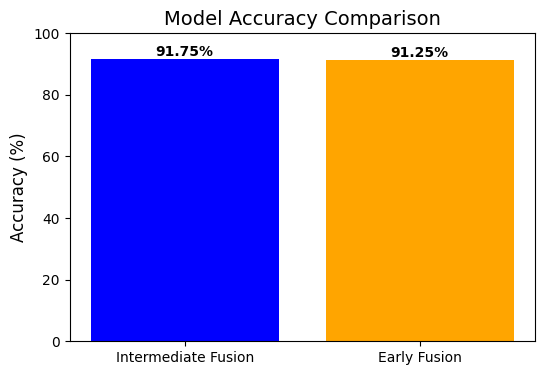

In [ ]:
# Compare Accuracies Visually
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

acc_inter = accuracy_score(y_true_inter, y_pred_inter)
acc_early = accuracy_score(y_true_early, y_pred_early)

models = ['Intermediate Fusion', 'Early Fusion']
accuracies = [acc_inter * 100, acc_early * 100]

plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=['blue', 'orange']) # Use different colors

plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)

for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show()

In [ ]:
cxr_train = img_gen.flow_from_directory(
    os.path.join("/root/.cache/kagglehub/datasets/hossamfakher/cxr-ct-cough/versions/3/processed_dataset/processed_dataset", "CXR"),
    target_size=(224, 224),
    batch_size=64,
    subset='training',
    class_mode='categorical'
)

Found 1600 images belonging to 4 classes.


In [ ]:
# ---- Recreate validation generators for Early Fusion ----
img_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

cxr_val = img_gen.flow_from_directory(
    os.path.join(data_path, "CXR"),
    target_size=(224, 224),
    batch_size=64,
    subset='validation',
    class_mode='categorical',
    shuffle=False
)

ct_val = img_gen.flow_from_directory(
    os.path.join(data_path, "CT"),
    target_size=(224, 224),
    batch_size=64,
    subset='validation',
    class_mode='categorical',
    shuffle=False
)

audio_val = img_gen.flow_from_directory(
    os.path.join(data_path, "Cough sound"),
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=64,
    subset='validation',
    class_mode='categorical',
    shuffle=False
)

# ---- Now evaluate Early Fusion ----
y_true_early, y_pred_early = [], []

val_steps = min(len(cxr_val), len(ct_val), len(audio_val))

for step in range(val_steps):
    cxr_batch, y_val = next(cxr_val)
    ct_batch, _ = next(ct_val)
    audio_batch, _ = next(audio_val)

    preds = early_fusion_model.predict([cxr_batch, ct_batch, audio_batch], verbose=0)
    y_true_early.extend(np.argmax(y_val, axis=1))
    y_pred_early.extend(np.argmax(preds, axis=1))


Found 400 images belonging to 4 classes.
Found 400 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [ ]:
if len(y_true_early) == 0 or len(y_pred_early) == 0:
    print("⚠️ No predictions generated for Early Fusion. Check val_steps or reset generators.")



Intermediate Fusion Accuracy: 91.75%
Early Fusion Accuracy: 90.00%


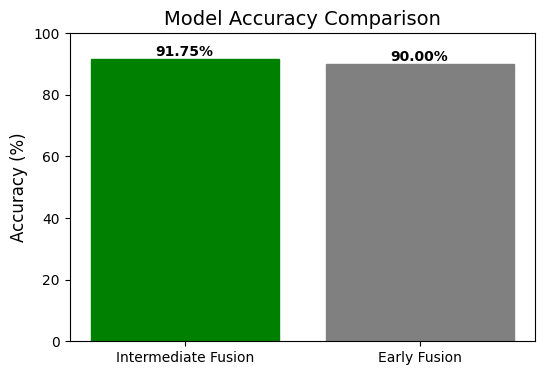

In [ ]:
# ==========================================================
#                VISUAL COMPARISON (BAR CHART)
# ==========================================================
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Recalculate accuracies just to be safe
acc_inter = accuracy_score(y_true_inter, y_pred_inter)
print(f"\nIntermediate Fusion Accuracy: {acc_inter*100:.2f}%")

acc_early = accuracy_score(y_true_early, y_pred_early)
print(f"Early Fusion Accuracy: {acc_early*100:.2f}%")

# Model names and accuracies
models = ['Intermediate Fusion', 'Early Fusion']
accuracies = [acc_inter * 100, acc_early * 100]

# Create bar chart
plt.figure(figsize=(6,4))
bars = plt.bar(models, accuracies)

# Highlight the better model
if acc_early > acc_inter:
    bars[1].set_color('green')
    bars[0].set_color('gray')
else:
    bars[0].set_color('green')
    bars[1].set_color('gray')

# Chart styling
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)

# Display accuracy values above bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.show()


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



📈 Model Comparison:

                Model  Accuracy (%)      Loss
0  CXR Classification     23.999999  1.391917
1   CT Classification     24.750000  1.397370


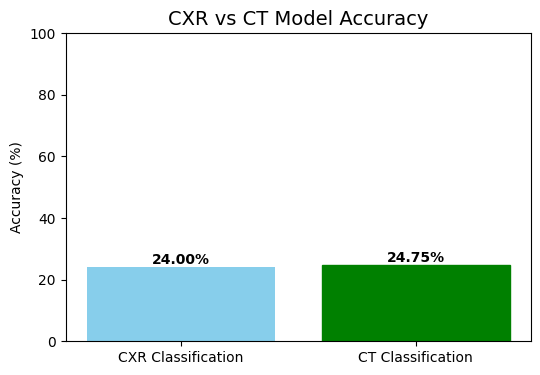

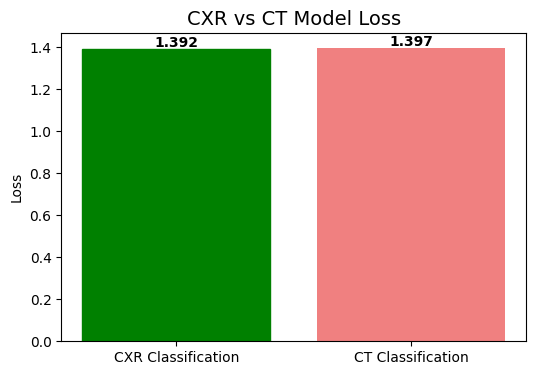

In [ ]:
# ==========================================================
#           📊 COMPARE CXR AND CT CLASSIFICATION MODELS
# ==========================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===============================
# 🔹 Evaluate both models
# ===============================
cxr_val_loss, cxr_val_acc = cxr_model.evaluate(cxr_val, verbose=0)
ct_val_loss, ct_val_acc = ct_model.evaluate(ct_val, verbose=0)

# Convert accuracy to percentage
cxr_val_acc *= 100
ct_val_acc *= 100

# ===============================
# 🔹 Create DataFrame for comparison
# ===============================
comparison_df = pd.DataFrame({
    'Model': ['CXR Classification', 'CT Classification'],
    'Accuracy (%)': [cxr_val_acc, ct_val_acc],
    'Loss': [cxr_val_loss, ct_val_loss]
})

print("\n📈 Model Comparison:\n")
print(comparison_df)

# ===============================
# 🎨 Accuracy Comparison Bar Chart
# ===============================
plt.figure(figsize=(6,4))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy (%)'], color=['skyblue', 'lightcoral'])

# Highlight best model in green
best_idx = comparison_df['Accuracy (%)'].idxmax()
bars[best_idx].set_color('green')

# Add accuracy labels
for i, v in enumerate(comparison_df['Accuracy (%)']):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.title('CXR vs CT Model Accuracy', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.show()

# ===============================
# 🎨 Loss Comparison Bar Chart
# ===============================
plt.figure(figsize=(6,4))
bars = plt.bar(comparison_df['Model'], comparison_df['Loss'], color=['skyblue', 'lightcoral'])

# Highlight lowest loss in green
best_idx = comparison_df['Loss'].idxmin()
bars[best_idx].set_color('green')

# Add loss labels
for i, v in enumerate(comparison_df['Loss']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

plt.title('CXR vs CT Model Loss', fontsize=14)
plt.ylabel('Loss')
plt.show()


In [ ]:
# Define individual CXR model
input_cxr_single = Input(shape=(224, 224, 3), name='CXR_Input_Single')
x_cxr = Conv2D(32, (3,3), activation='relu', padding='same')(input_cxr_single)
x_cxr = MaxPooling2D((2,2))(x_cxr)
x_cxr = Conv2D(64, (3,3), activation='relu', padding='same')(x_cxr)
x_cxr = MaxPooling2D((2,2))(x_cxr)
x_cxr = Flatten()(x_cxr)
x_cxr = Dense(128, activation='relu')(x_cxr)
x_cxr = Dropout(0.4)(x_cxr)
output_cxr = Dense(4, activation='softmax', name='CXR_Output')(x_cxr)

cxr_model = Model(inputs=input_cxr_single, outputs=output_cxr)

# Define individual CT model
input_ct_single = Input(shape=(224, 224, 3), name='CT_Input_Single')
x_ct = Conv2D(32, (3,3), activation='relu', padding='same')(input_ct_single)
x_ct = MaxPooling2D((2,2))(x_ct)
x_ct = Conv2D(64, (3,3), activation='relu', padding='same')(x_ct)
x_ct = MaxPooling2D((2,2))(x_ct)
x_ct = Flatten()(x_ct)
x_ct = Dense(128, activation='relu')(x_ct)
x_ct = Dropout(0.4)(x_ct)
output_ct = Dense(4, activation='softmax', name='CT_Output')(x_ct)

ct_model = Model(inputs=input_ct_single, outputs=output_ct)


📊 Overall Model Comparison:

                 Model  Accuracy (%)      Loss
0   CXR Classification     23.999999  1.391917
1    CT Classification     24.750000  1.397370
2  Intermediate Fusion     91.750000       NaN
3         Early Fusion     90.000000       NaN


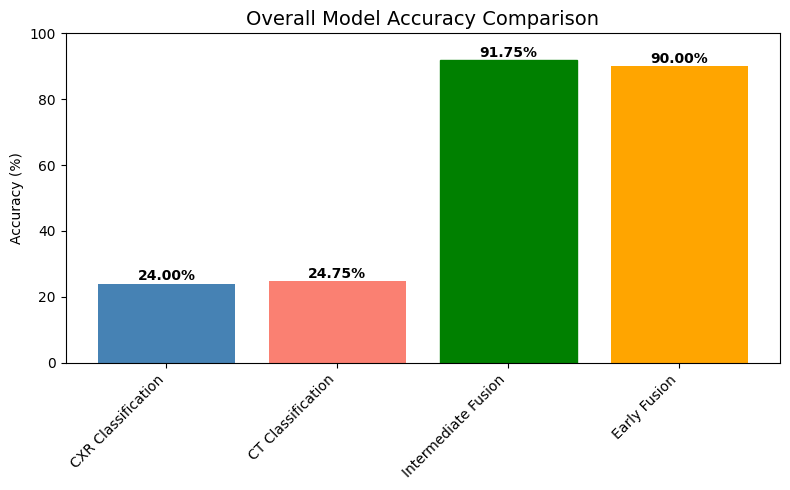

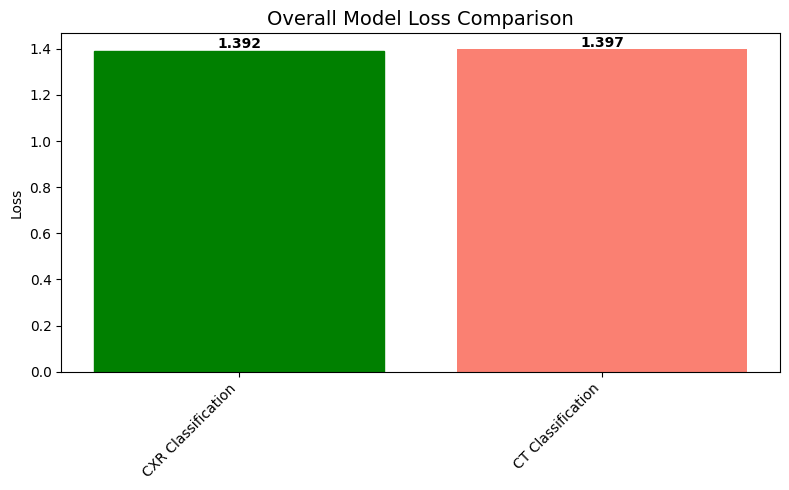

In [ ]:
# ==========================================================
#           📊 COMPARE ALL FOUR MODELS (CXR, CT, Inter, Early)
# ==========================================================

# ==========================================================
#       1️⃣ Evaluate CXR & CT Models (Direct Evaluation)
# ==========================================================
cxr_val_loss, cxr_val_acc = cxr_model.evaluate(cxr_val, verbose=0)
ct_val_loss, ct_val_acc = ct_model.evaluate(ct_val, verbose=0)

# ==========================================================
#       2️⃣ Evaluate Fusion Models (Using Predictions)
# ==========================================================
acc_inter = accuracy_score(y_true_inter, y_pred_inter)
acc_early = accuracy_score(y_true_early, y_pred_early)

# Optional: add losses for fusion models if available
# inter_loss = None  # Replace with actual validation loss if you have it
# early_loss = None  # Replace with actual validation loss if you have it

# ==========================================================
#       3️⃣ Create a DataFrame for All Models
# ==========================================================
comparison_df = pd.DataFrame({
    'Model': ['CXR Classification', 'CT Classification', 'Intermediate Fusion', 'Early Fusion'],
    'Accuracy (%)': [
        cxr_val_acc * 100,
        ct_val_acc * 100,
        acc_inter * 100,
        acc_early * 100
    ],
    'Loss': [
        cxr_val_loss,
        ct_val_loss,
        None, # Assuming loss is not directly available from prediction lists
        None  # Assuming loss is not directly available from prediction lists
    ]
})

print("\n📊 Overall Model Comparison:\n")
print(comparison_df)

# ==========================================================
#       4️⃣ Accuracy Comparison Bar Chart
# ==========================================================
plt.figure(figsize=(8,5))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy (%)'], color=['steelblue', 'salmon', 'gray', 'orange'])

# Highlight the best-performing model in green
best_idx = comparison_df['Accuracy (%)'].idxmax()
bars[best_idx].set_color('green')

# Add accuracy values above bars
for i, v in enumerate(comparison_df['Accuracy (%)']):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold')

plt.title('Overall Model Accuracy Comparison', fontsize=14) # Updated title
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# ==========================================================
#       5️⃣ Loss Comparison Bar Chart (if losses are available)
# ==========================================================
# Check if loss data is available before plotting
if not comparison_df['Loss'].isnull().all():
    plt.figure(figsize=(8,5))
    bars_loss = plt.bar(comparison_df['Model'], comparison_df['Loss'], color=['steelblue', 'salmon', 'gray', 'orange'])

    # Highlight lowest loss in green (excluding None values)
    valid_losses = comparison_df.dropna(subset=['Loss'])
    if not valid_losses.empty:
        best_loss_idx = valid_losses['Loss'].idxmin()
        bars_loss[best_loss_idx].set_color('green')

    # Add loss labels (only for non-None values)
    for i, v in enumerate(comparison_df['Loss']):
        if pd.notna(v):
             plt.text(i, v + 0.01, f'{v:.3f}', ha='center', fontweight='bold')

    plt.title('Overall Model Loss Comparison', fontsize=14) # Updated title
    plt.ylabel('Loss')
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()
else:
    print("\nLoss comparison chart not generated: Loss data not available for all models.")